In [1]:
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as ss
import numpy as np

In [ ]:
# Directories and files
DATA_DIR = "../../data/combined/"

# File Names
TEST_NUMBER = "test1"
FILE_PEARSON = "../price_pearson_{}.csv".format(TEST_NUMBER)
FILE_NCC = "../price_ncc_{}.csv".format(TEST_NUMBER)
FILE_PCT = "../price_pct_{}.csv".format(TEST_NUMBER)

In [2]:
# Load Data File List
file_list = os.listdir(DATA_DIR)
noisy = ['000050','000180','001070', '001800', '001940', '002220', '002410', '002840', '002870', '002900', '003080', '003090', '003410',
         '003610', '003850', '004410', '004990', '005300', '005720', '005740', '005930', '010100', '010660', '012030', '013360', '013520',
          '013700', '014280', '014530', '017810', '018880', '023450', '027410', '035420', '044450', '095570', '104700', '107590', '138250',
          '144620', '161000', '204320', '284740']

file_list = [f for f in file_list if f[:-4] not in noisy]
codes_list = [f[:-4] for f in file_list if f[:-4] not in noisy]

In [3]:
codes_list[:5]

['000020', '000040', '000060', '000070', '000080']

## Calculate Pearson Correlation

In [5]:
# Calculate Correlation Data

correlation_list = []

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    
    # Scale
    df -= df.min()
    df /= df.max()
    
    # Calculate Pearson Correlation
    correlation_value = df.corr().iloc[0,2]
    
    print(file, correlation_value)
    correlation_list.append(correlation_value)

000020.csv -0.12800661446737924
000040.csv -0.05896043626610537
000060.csv 0.26297681922360266
000070.csv 0.17642907346041511
000080.csv 0.0918732300894882
000100.csv -0.16496002363567097
000120.csv 0.01249929318698267
000140.csv -0.07690921903733407
000150.csv 0.13451146621278642
000210.csv 0.0045892808585686375
000220.csv 0.06217273414697621
000230.csv -0.09884497610421418
000240.csv -0.421429880315669
000270.csv 0.08988026783311798
000300.csv 0.1624741969339822
000320.csv -0.11457003449529561
000370.csv -0.16523747211987772
000390.csv 0.4215177204730755
000400.csv -0.1497923597998596
000430.csv 0.18765451328705623
000480.csv -0.030036037936037804
000490.csv -0.3841049208900203
000500.csv 0.03231713730177483
000520.csv -0.317913119119217
000540.csv 0.04908837757924431
000590.csv 0.2787157573825298
000640.csv 0.35293238063659554
000650.csv -0.25331453445300184
000660.csv 0.31179814590949617
000670.csv -0.20933176576730636
000680.csv -0.1050105918455049
000700.csv 0.19511523538979192
0

008500.csv -0.002800197758357081
008560.csv -0.04166286418609876
008600.csv 0.13096421125232635
008700.csv 0.1643671438067941
008730.csv 0.030063074303156998
008770.csv -0.0042838634570893895
008870.csv -0.13668196932254134
008930.csv 0.06875639248610033
008970.csv 0.34561090196981176
009070.csv 0.08698097959923032
009140.csv 0.048102130958712075
009150.csv -0.2115371513474839
009160.csv -0.03480909560765288
009180.csv -0.4760687184450012
009190.csv 0.0036089733791494403
009200.csv 0.05413859728697843
009240.csv -0.23297589367553628
009270.csv -0.03235831895917
009290.csv 0.21509421275257584
009310.csv -0.09315895372843354
009320.csv 0.15114125001033718
009410.csv -0.1935307596339281
009420.csv 0.020281666581536736
009440.csv 0.036407719570405124
009450.csv -0.014826676618648634
009460.csv 0.012622909960697027
009470.csv -0.12191598800852327
009540.csv 0.08187369246789052
009580.csv -0.10969565779728105
009680.csv 0.1250103566088652
009770.csv -0.06265089947679056
009810.csv -0.0301438

071950.csv -0.004957759310306833
071970.csv -0.08831402307234378
072130.csv -0.4246222372043113
072710.csv 0.02404951026529889
073240.csv -0.04727264258356121
074610.csv -0.04242848402857468
075180.csv -0.19029131111925823
075580.csv 0.20905615425321758
077500.csv -0.08106126549337031
077970.csv -0.10997020967894769
078000.csv 0.04366978238659003
078520.csv -0.45041457869562085
078930.csv -0.22442505357926115
079160.csv 0.32242358287007716
079430.csv 0.18434531552657354
079440.csv -0.19498457219889165
079550.csv 0.011668231923780628
079980.csv -0.02351237800014452
081000.csv 0.3898858868014479
081660.csv -0.13175372181072467
082640.csv -0.061291293419383594
082740.csv -0.06779307005088324
083370.csv -0.017818001407169607
083380.csv 0.34543995317793424
083420.csv 0.10755414057164635
084010.csv -0.023003748921539256
084670.csv -0.02058024649555293
084680.csv -0.004771322790360034
084690.csv 0.4536134968142199
084870.csv -0.19534079365812976
085310.csv 0.11769538496620285
085620.csv 0.170

In [6]:
# Convert To Dataframe
correlations_df = pd.DataFrame(list(zip(codes_list,correlation_list)), columns=['code','corr'])
correlations_df = correlations_df.dropna()

# Save as CSV
correlations_df.to_csv(FILE_PEARSON, index=False)

In [49]:
# Load Correlation Data
df = pd.read_csv(FILE_PEARSON)
df.head()

,code,corr
0,20,-0.128007
1,40,-0.058960
2,60,0.262977
3,70,0.176429
4,80,0.091873


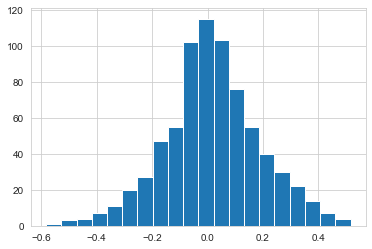

In [50]:
# Draw Histogram
plt.hist(df['corr'], 20)
plt.show()

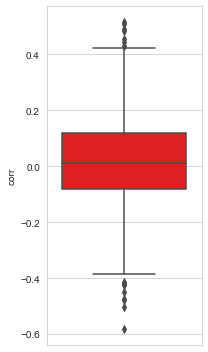

In [51]:
# Draw Boxplot
plt.subplots(1,1,figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(df['corr'],color='red',orient='v')
plt.tight_layout()

In [34]:
# See Outliers
# print(df['corr'])
positive_outliers = df[df['corr'] > 0.4]
print(positive_outliers.head())
negative_outliers = df[df['corr'] < -0.4]
print(negative_outliers.head())

      code      corr
17     390  0.421518
44    1040  0.410031
107   2620  0.408642
209   5500  0.506976
324  10770  0.482401
      code      corr
12     240 -0.421430
99    2350 -0.504184
290   9180 -0.476069
441  24890 -0.473443
460  28260 -0.412027


## Normalized Cross Correlation With Time Shift

In [11]:
def ccf(x, y, lag_max = 100):
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

In [12]:
ncc_list = []
lag_list = []
lag = 10

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    
    # Scale
    df -= df.min()
    df /= df.max()
    prices = df['price'].values
    ratio = df['ratio'].values
    
    # Calculate Normalized Cross Correlation With Different Time Shift(Lag=10)
    
    ncc = ccf(prices,ratio,lag_max=lag)
    # Find max index
    max_idx = np.argmax(abs(ncc))
    # Find max correlation
    max_ncc = ncc[max_idx]
    # Find max lag
    max_lag = max_idx - lag
    
    print(file, max_ncc, max_lag)
    ncc_list.append(max_ncc)
    lag_list.append(max_lag)

000020.csv -0.16010588456289998 -10
000040.csv -0.05965993726207754 -1
000060.csv 0.2866911782807868 8
000070.csv 0.1810772258743895 -5
000080.csv 0.09921386603201912 -7
000100.csv -0.1649600236356708 0
000120.csv 0.015400206803748767 1
000140.csv -0.0931011612416033 -9
000150.csv 0.15367322405572637 10
000210.csv 0.007444319136863711 10
000220.csv 0.06270113801003138 1
000230.csv -0.1017707746964894 -10
000240.csv -0.43401169693766184 -8
000270.csv 0.10777777462270495 -7
000300.csv 0.18588628624382517 -10
000320.csv -0.12914101857102295 -10
000370.csv -0.16523747211987763 0
000390.csv 0.4276199378456773 7
000400.csv -0.15944189146598634 2
000430.csv 0.19519467793942324 10
000480.csv -0.040481586026491524 9
000490.csv -0.41091349059393384 -10
000500.csv 0.05478555113620612 8
000520.csv -0.32466014628372347 5
000540.csv 0.053689872275557396 -7
000590.csv 0.2945215565862642 -2
000640.csv 0.35471090353832163 -1
000650.csv -0.27247947979083265 -10
000660.csv 0.3453092124109754 5
000670.csv

007280.csv -0.09345234310082962 10
007310.csv -0.08920018375585283 -3
007340.csv 0.057797151184535364 10
007460.csv -0.10405733776050272 10
007540.csv -0.11681814741165499 10
007570.csv -0.3093798481879547 -7
007590.csv 0.36175012214494223 10
007610.csv -0.30123304837047377 10
007630.csv 0.23894176170511866 10
007660.csv -0.024489025169558577 2
007690.csv 0.3684879154065845 -10
007700.csv 0.20816739684783833 -10
007810.csv 0.08181770221319846 -9
007860.csv -0.07874022654980053 0
007980.csv 0.09398308616616317 -10
008040.csv 0.3060696807989465 -6
008060.csv -0.2088904635161132 10
008110.csv 0.05321094009225003 10
008250.csv 0.02751545129063955 9
008260.csv -0.15947271133018326 10
008350.csv 0.30395473253805716 0
008420.csv 0.03799995446218666 -10
008490.csv 0.13206370618375454 -4
008500.csv 0.014338765894044024 -10
008560.csv -0.0457676019872373 8
008600.csv 0.1346092151079439 7
008700.csv 0.1657797143123464 -8
008730.csv 0.03807096463364097 5
008770.csv 0.02421306124013953 10
008870.cs

036580.csv 0.08078182918560306 -3
037270.csv -0.18818870829097337 -7
037560.csv 0.3848779131515211 -3
037710.csv 0.20154739956087908 -4
039130.csv 0.15999243680591052 -4
039490.csv -0.1875985433783379 10
039570.csv 0.23660429036128894 10
041650.csv -0.05883551640076111 -5
042660.csv 0.19113503806488732 10
042670.csv -0.03805094281396544 2
042700.csv 0.03639489551050479 -10
044380.csv 0.3170043834747849 4
044820.csv -0.2250813204898408 -7
047040.csv -0.18639146319864777 -10
047050.csv 0.11926070003500537 -4
047400.csv 0.2627793709217447 9
047810.csv 0.14035877819316708 10
049770.csv -0.013682115539139752 -4
049800.csv -0.29953373814618456 2
051600.csv 0.2771079646404313 -10
051630.csv -0.05392941185106383 10
051900.csv 0.2158700073856337 -10
051910.csv -0.06554690137384607 -9
052690.csv 0.07112996383671312 7
053210.csv -0.12092384288700654 -10
053690.csv -0.10630204331825586 -10
055490.csv -0.31092954685628543 -5
055550.csv -0.1758104113399271 7
057050.csv 0.1610420632404788 -2
058430.c

In [13]:
# Convert To Dataframe
ncc_df = pd.DataFrame(list(zip(codes_list,ncc_list,lag_list)), columns=['code','ncc', 'lag'])
ncc_df = ncc_df.dropna()

# Save as CSV
ncc_df.to_csv(FILE_NCC, index=False)

In [35]:
# Load Correlation Data
ncc_loaded = pd.read_csv(FILE_NCC)
ncc_loaded.head()

,code,ncc,lag
0,20,-0.160106,-10
1,40,-0.059660,-1
2,60,0.286691,8
3,70,0.181077,-5
4,80,0.099214,-7


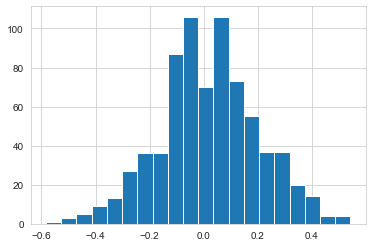

In [36]:
# Draw Histogram
plt.hist(ncc_loaded['ncc'], 20)
plt.show()

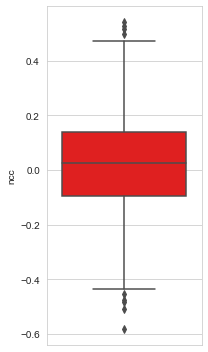

In [48]:
# Draw Boxplot
plt.subplots(1,1, figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(ncc_loaded['ncc'],color='red',orient='v')
plt.tight_layout()

In [38]:
# See Outliers
# print(df['corr'])
positive_outliers = ncc_loaded[ncc_loaded['ncc'] > 0.4]
print(positive_outliers.head())
negative_outliers = ncc_loaded[ncc_loaded['ncc'] < -0.4]
print(negative_outliers.head())

     code       ncc  lag
17    390  0.427620    7
44   1040  0.414290    2
107  2620  0.416694    5
149  3670  0.400187    5
209  5500  0.514016    3
      code       ncc  lag
12     240 -0.434012   -8
21     490 -0.410913  -10
99    2350 -0.509194   -9
290   9180 -0.482233   10
441  24890 -0.474022    3


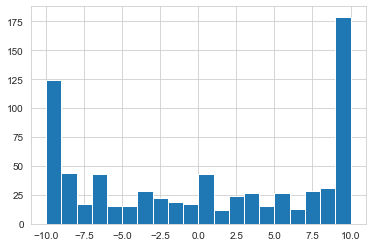

In [17]:
plt.hist(ncc_loaded['lag'], 20)
plt.show()

## Using percentage changes

In [20]:
ncc_pct_list = []
lag_pct_list = []
lag = 10

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    df = df.pct_change()
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    df = df.abs()
    
    # Calculate Normalized Cross Correlation With Different Time Shift(Lag=10)
    prices = df['price'].values
    ratio = df['ratio'].values    
    ncc = ccf(prices,ratio,lag_max=lag)
    
    # Find max index
    max_idx = np.argmax(abs(ncc))
    # Find max correlation
    max_ncc = ncc[max_idx]
    # Find max lag
    max_lag = max_idx - lag
    
    print(file, max_ncc, max_lag)
    ncc_pct_list.append(max_ncc)
    lag_pct_list.append(max_lag)

000020.csv -0.2513520623375621 1
000040.csv 0.19325785599330061 -2
000060.csv 0.12640999258538585 7
000070.csv -0.17219895429428334 2
000080.csv -0.2792151333869088 1
000100.csv 0.08767705870153358 10
000120.csv -0.11951618945544262 -5
000140.csv -0.1948283060881682 -5
000150.csv -0.34646327734455634 1
000210.csv -0.15337674382165523 9
000220.csv 0.11222259586629757 -7
000230.csv -0.22046425474741152 1
000240.csv -0.22779767769071613 1
000270.csv -0.26884090848223 1
000300.csv -0.20269227041708454 1
000320.csv -0.2342720493602623 1
000370.csv -0.2857199851472178 1
000390.csv -0.20139121143893554 1
000400.csv 0.09790621101642494 7
000430.csv -0.1737689893855489 1
000480.csv -0.14176988678731625 1
000490.csv -0.1661150643010981 1
000500.csv 0.12576657990581827 0
000520.csv -0.18505326936109212 1
000540.csv -0.15184616958312747 1
000590.csv -0.2046928294586924 1
000640.csv -0.24999571521699357 1
000650.csv -0.05465941015802216 1
000660.csv -0.15905039394207265 1
000670.csv -0.187211315780

007310.csv -0.0948458161877292 -5
007340.csv 0.04291864889388803 9
007460.csv -0.19339817653747432 1
007540.csv -0.17237986604762165 1
007570.csv -0.25641320026772163 1
007590.csv -0.2173141262237545 1
007610.csv -0.20993691698335135 1
007630.csv -0.1645482210457307 1
007660.csv -0.2611648011702935 1
007690.csv -0.2940543539847932 1
007700.csv -0.21497252532142408 1
007810.csv -0.28708240949963026 1
007860.csv -0.20395214109955548 1
007980.csv -0.25022905279207086 1
008040.csv -0.2062446313904139 1
008060.csv -0.2546874874332432 1
008110.csv -0.061475523879565744 -2
008250.csv -0.09791634281524748 1
008260.csv -0.26868400360032385 1
008350.csv -0.20939718035217653 1
008420.csv 0.169403145546639 0
008490.csv -0.25075450066987837 1
008500.csv -0.21359020581658208 1
008560.csv -0.2114729742253501 1
008600.csv -0.26193591498568647 1
008700.csv -0.19620979443761422 1
008730.csv -0.20253453235394464 1
008770.csv 0.1787640693582309 -1
008870.csv -0.1662302432752341 1
008930.csv 0.103240743948

041650.csv -0.2508073123286692 1
042660.csv -0.29039251273378297 1
042670.csv -0.2762725604235139 1
042700.csv -0.138978209310852 -5
044380.csv -0.2361908031558959 1
044820.csv -0.21766063727776902 2
047040.csv -0.22456387484185047 1
047050.csv -0.20944304330373736 1
047400.csv -0.23034188825279803 1
047810.csv -0.2132203115416014 1
049770.csv -0.12029400655920695 1
049800.csv -0.2159510567521735 1
051600.csv -0.27462521547752144 1
051630.csv -0.1639282182644159 1
051900.csv -0.269311512479273 1
051910.csv -0.26289489390251747 1
052690.csv 0.050063797906924994 -3
053210.csv -0.21171709426917462 1
053690.csv -0.04121932182137479 1
055490.csv -0.25769989526572834 1
055550.csv -0.09615050131267613 -9
057050.csv -0.3058632755255906 1
058430.csv -0.2395247410763706 1
058650.csv -0.11959609389069119 9
058730.csv -0.20648925347089672 1
058850.csv -0.2091323217678856 1
058860.csv -0.26377815899933726 1
060980.csv -0.19430389511668283 1
063160.csv -0.18513445820417787 1
064350.csv -0.1915599052

In [22]:
# Convert To Dataframe
ncc_pct_df = pd.DataFrame(list(zip(codes_list,ncc_pct_list,lag_pct_list)), columns=['code','ncc', 'lag'])
ncc_pct_df = ncc_pct_df.dropna()

# Save as CSV
ncc_pct_df.to_csv(FILE_PCT, index=False)

In [23]:
# Load Percentage Data
ncc_pct_loaded = pd.read_csv(FILE_PCT)
ncc_pct_loaded.head()

,code,ncc,lag
0,20,-0.251352,1
1,40,0.193258,-2
2,60,0.126410,7
3,70,-0.172199,2
4,80,-0.279215,1


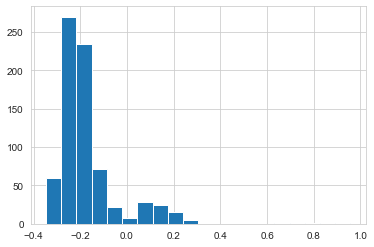

In [24]:
# Draw Histogram
plt.hist(ncc_pct_loaded['ncc'], 20)
plt.show()

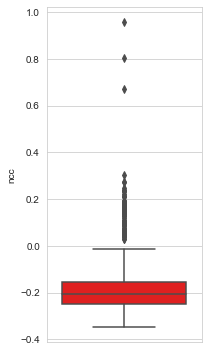

In [47]:
# Draw Boxplot
plt.subplots(1,1, figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(ncc_pct_loaded['ncc'],color='red',orient='v')
plt.tight_layout()

In [40]:
# See Outliers
# print(df['corr'])
positive_outliers = ncc_pct_loaded[ncc_pct_loaded['ncc'] > 0.4]
print(positive_outliers.head())
negative_outliers = ncc_pct_loaded[ncc_pct_loaded['ncc'] < -0.4]
print(negative_outliers.head())

       code       ncc  lag
630  103130  0.956832    4
637  109070  0.804077    5
718  267290  0.672190  -10
Empty DataFrame
Columns: [code, ncc, lag]
Index: []
